<font size=14>An exploration into integrating NDWI and NDVI for delineating temporary floodplain/seasonal wetland<br>as related to quantifying salmonid habitat.</font>
<br>
Please review the 3_Intro_TFD_NDWI_DryWetComp and 4_Intro_TFD_NDVI_DryWetComp notebooks first, if you are not familiar with this project.

In [1]:
# Libraries needed for running this notebook
import numpy as np
import rasterio
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage.filters import threshold_minimum

In [2]:
# NDVI is a remote sensing index or derived band from other bands that is particularly good at detecting vegetation (trees/fields)
def gen_NDVI(image_path):
    with rasterio.open(image_path) as ds:
        red_band3 = ds.read(3)
        nir_band4 = ds.read(4)
        np.seterr(divide='ignore', invalid='ignore')
        ndvi_array = ((nir_band4.astype(float) - red_band3.astype(float)) / (nir_band4.astype(float) + red_band3.astype(float)))
        ds.close()
    return ndvi_array 

In [3]:
# NDWI is a remote sensing index or derived band from other bands that is particularly good at detecting water
def gen_NDWI(image_path):
    with rasterio.open(image_path) as ds:
        green_band2 = ds.read(2)
        nir_band4 = ds.read(4)
        np.seterr(divide='ignore', invalid='ignore')
        ndwi_array = ((green_band2.astype(float) - nir_band4.astype(float)) / (green_band2.astype(float) + nir_band4.astype(float)))
        ds.close()
    return ndwi_array 

In [4]:
# load images from data folder
dry_img_path = "./intro_data/reflectance/20161011_final_mosaic.tif"
wet_img_path = "./intro_data/reflectance/20170228_final_mosaic.tif"
ndwi_dry_img = gen_NDWI(dry_img_path)
ndwi_wet_img = gen_NDWI(wet_img_path)
ndvi_dry_img = gen_NDVI(dry_img_path)
ndvi_wet_img = gen_NDVI(wet_img_path)
print('Image shape should all be equal')
print(ndwi_dry_img.shape, ndwi_wet_img.shape)
print(ndvi_dry_img.shape, ndvi_dry_img.shape)

Image shape should all be equal
(1334, 1334) (1334, 1334)
(1334, 1334) (1334, 1334)


We need to remove "No Data Values". This creates an image for display purposes that maintains the exact shape and creates a modified array for use in histogram analysis. The difference is that the image for display is replacing NaN values as 0, which maintains the array indexing but would effect the data distribution on a histogram, so the histogram array actually removes all the NaN values but changes the array indexing.

In [5]:
# by default nan_to_num is setting No Data Values (NaN) as 0 which should have limited visual impact as NDWI and NDVI range from -1 to 1
ndwi_dry_img_display = np.nan_to_num(ndwi_dry_img)
ndwi_wet_img_display = np.nan_to_num(ndwi_wet_img)
ndwi_dry_histo = ndwi_dry_img[~np.isnan(ndwi_dry_img)]
ndwi_wet_histo = ndwi_wet_img[~np.isnan(ndwi_wet_img)]
assert ndwi_dry_img_display.shape == ndwi_wet_img_display.shape
total_img_pixels = ndwi_dry_img_display.shape[0]*ndwi_dry_img_display.shape[1]
print('Shape of NDWI Images for Display: {} | Total number of pixels: {}'.format(ndwi_dry_img_display.shape, total_img_pixels))
print('Number of non-NaN values in the NDWI Dry Histogram Array: {} | Removed {} NaN values'.format(ndwi_dry_histo.shape, total_img_pixels - ndwi_dry_histo.shape[0]))
print('Number of non-NaN values in the NDWI Wet Histogram Array: {} | Removed {} NaN values'.format(ndwi_wet_histo.shape, total_img_pixels - ndwi_wet_histo.shape[0]))
ndvi_dry_img_display = np.nan_to_num(ndvi_dry_img)
ndvi_wet_img_display = np.nan_to_num(ndvi_wet_img)
ndvi_dry_histo = ndvi_dry_img[~np.isnan(ndvi_dry_img)]
ndvi_wet_histo = ndvi_wet_img[~np.isnan(ndvi_wet_img)]
assert ndvi_dry_img_display.shape == ndvi_wet_img_display.shape
total_img_pixels = ndvi_dry_img_display.shape[0]*ndvi_dry_img_display.shape[1]
print('Shape of NDVI Images for Display: {} | Total number of pixels: {}'.format(ndvi_dry_img_display.shape, total_img_pixels))
print('Number of non-NaN values in the NDVI Dry Histogram Array: {} | Removed {} NaN values'.format(ndvi_dry_histo.shape, total_img_pixels - ndvi_dry_histo.shape[0]))
print('Number of non-NaN values in the NDVI Wet Histogram Array: {} | Removed {} NaN values'.format(ndvi_wet_histo.shape, total_img_pixels - ndvi_wet_histo.shape[0]))

Shape of NDWI Images for Display: (1334, 1334) | Total number of pixels: 1779556
Number of non-NaN values in the NDWI Dry Histogram Array: (1778888,) | Removed 668 NaN values
Number of non-NaN values in the NDWI Wet Histogram Array: (1778889,) | Removed 667 NaN values
Shape of NDVI Images for Display: (1334, 1334) | Total number of pixels: 1779556
Number of non-NaN values in the NDVI Dry Histogram Array: (1778888,) | Removed 668 NaN values
Number of non-NaN values in the NDVI Wet Histogram Array: (1778889,) | Removed 667 NaN values


Let's visualize our NDWI and NDVI Images and Histograms.

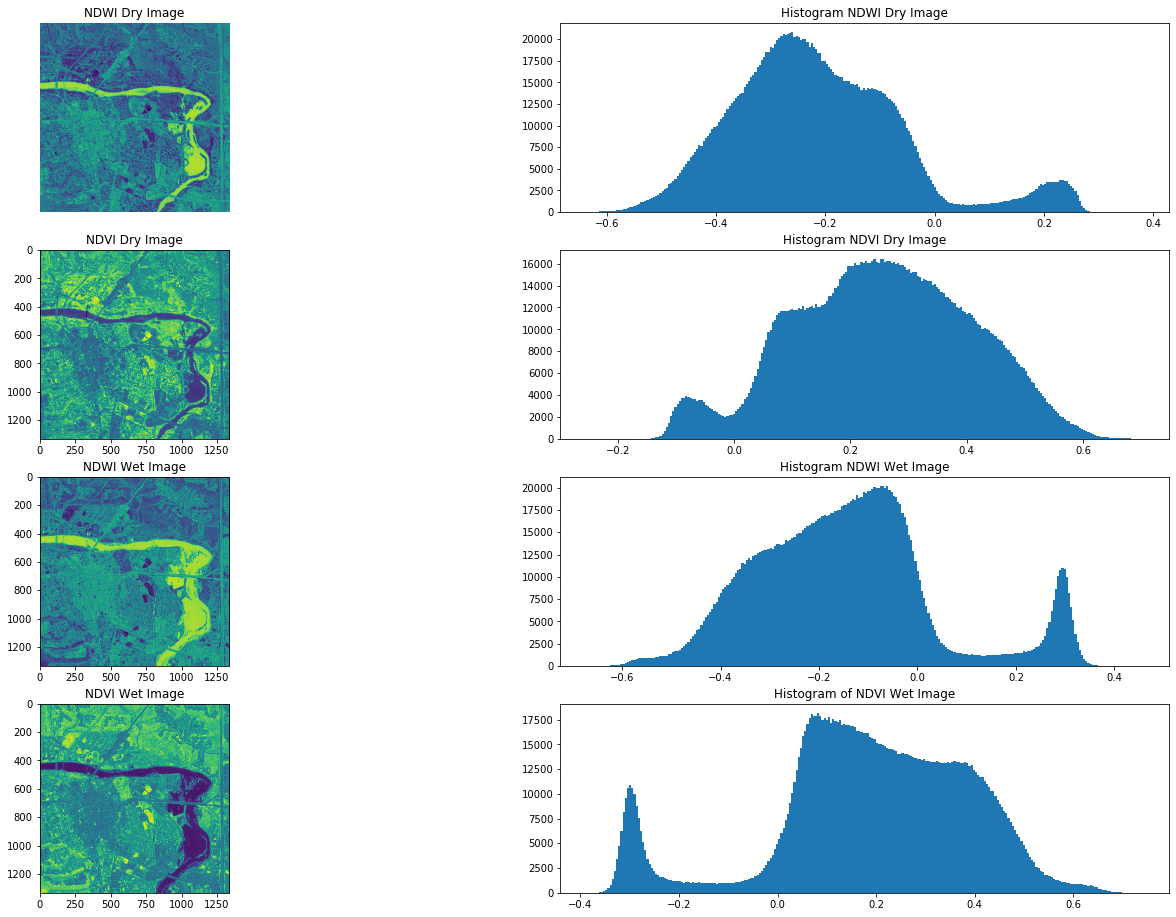

In [6]:
plt.figure(figsize=(24, 16))
plt.subplot(4, 2, 1)
plt.imshow(ndwi_dry_img_display, cmap=plt.cm.viridis)
plt.title('NDWI Dry Image')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.hist(ndwi_dry_histo, bins=256)
plt.title('Histogram NDWI Dry Image')

plt.subplot(4, 2, 3)
plt.imshow(ndvi_dry_img_display, cmap=plt.cm.viridis)
plt.title('NDVI Dry Image')

plt.subplot(4, 2, 4)
plt.hist(ndvi_dry_histo, bins=256)
plt.title('Histogram NDVI Dry Image')

plt.subplot(4, 2, 5)
plt.imshow(ndwi_wet_img_display, cmap=plt.cm.viridis)
plt.title('NDWI Wet Image')

plt.subplot(4, 2, 6)
plt.hist(ndwi_wet_histo, bins=256)
plt.title('Histogram NDWI Wet Image')

plt.subplot(4, 2, 7)
plt.imshow(ndvi_wet_img_display, cmap=plt.cm.viridis)
plt.title('NDVI Wet Image')

plt.subplot(4, 2, 8)
plt.hist(ndvi_wet_histo, bins=256)
plt.title('Histogram of NDVI Wet Image')
plt.show()

In [7]:
thresh_ndwi_dry = threshold_minimum(ndwi_dry_histo)
thresh_ndwi_wet = threshold_minimum(ndwi_wet_histo)
thresh_ndvi_dry = threshold_minimum(ndvi_dry_histo)
thresh_ndvi_wet = threshold_minimum(ndvi_wet_histo)

print('Threshold for NDWI Dry and Wet Images, respectively: ', thresh_ndwi_dry, thresh_ndwi_wet)
print('Threshold for NDVI Dry and Wet Images, respectively: ', thresh_ndvi_dry, thresh_ndvi_wet)

# Why is ndwi > but ndvi is < ?
ndwi_dry_timg = ndwi_dry_img_display > thresh_ndwi_dry 
ndwi_wet_timg = ndwi_wet_img_display > thresh_ndwi_wet
ndvi_dry_timg = ndvi_dry_img_display < thresh_ndvi_dry
ndvi_wet_timg = ndvi_wet_img_display < thresh_ndvi_wet

Threshold for NDWI Dry and Wet Images, respectively:  0.06385960747514319 0.13656676891866876
Threshold for NDVI Dry and Wet Images, respectively:  -0.01907646213388281 -0.12793576931963602


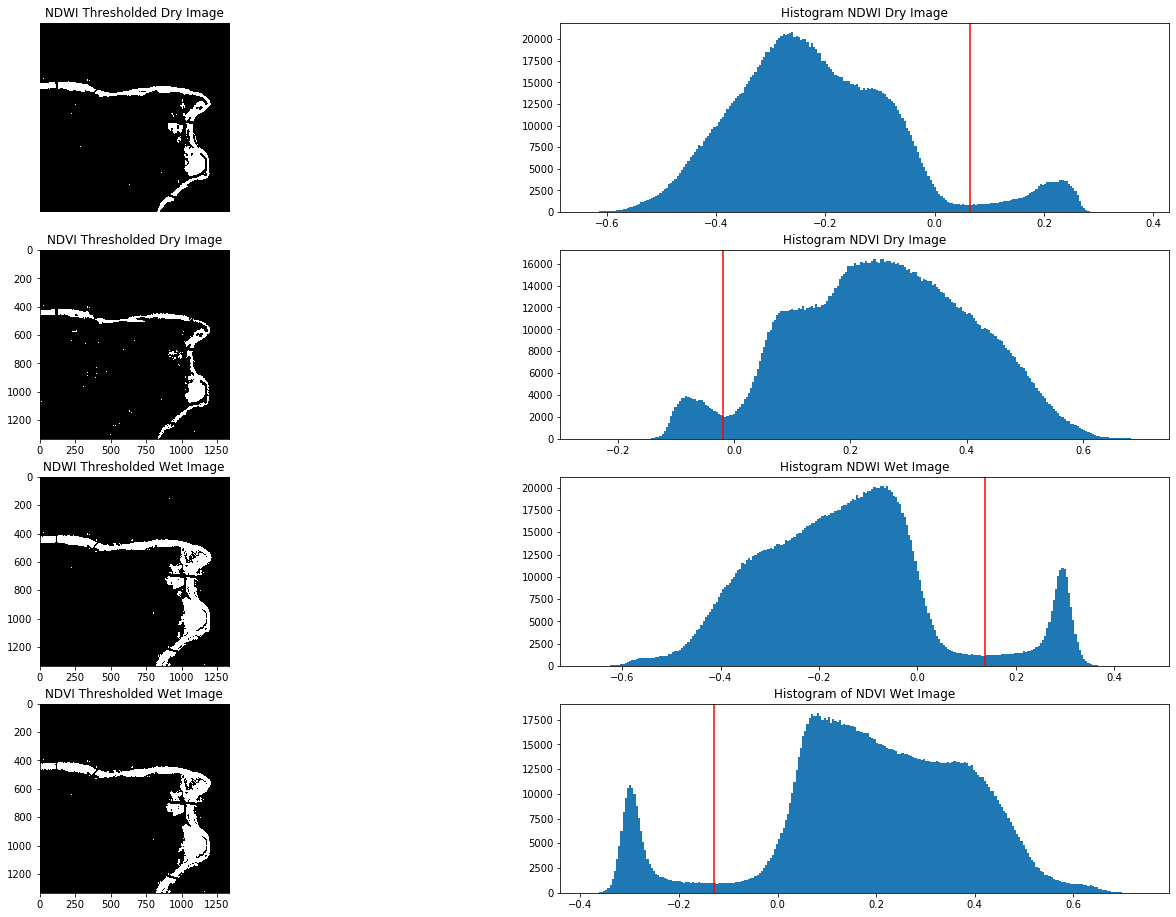

In [8]:
plt.figure(figsize=(24, 16))
plt.subplot(4, 2, 1)
plt.imshow(ndwi_dry_timg, cmap=plt.cm.gray)
plt.title('NDWI Thresholded Dry Image')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.hist(ndwi_dry_histo, bins=256)
plt.axvline(thresh_ndwi_dry, color='r')
plt.title('Histogram NDWI Dry Image')

plt.subplot(4, 2, 3)
plt.imshow(ndvi_dry_timg, cmap=plt.cm.gray)
plt.title('NDVI Thresholded Dry Image')

plt.subplot(4, 2, 4)
plt.hist(ndvi_dry_histo, bins=256)
plt.axvline(thresh_ndvi_dry, color='r')
plt.title('Histogram NDVI Dry Image')

plt.subplot(4, 2, 5)
plt.imshow(ndwi_wet_timg, cmap=plt.cm.gray)
plt.title('NDWI Thresholded Wet Image')

plt.subplot(4, 2, 6)
plt.hist(ndwi_wet_histo, bins=256)
plt.axvline(thresh_ndwi_wet, color='r')
plt.title('Histogram NDWI Wet Image')

plt.subplot(4, 2, 7)
plt.imshow(ndvi_wet_timg, cmap=plt.cm.gray)
plt.title('NDVI Thresholded Wet Image')

plt.subplot(4, 2, 8)
plt.hist(ndvi_wet_histo, bins=256)
plt.axvline(thresh_ndvi_wet, color='r')
plt.title('Histogram of NDVI Wet Image')
plt.show()

In [9]:
# ^ is the bitwise boolean operator for subtraction
ndwi_dry_wet = ndwi_dry_timg ^ ndwi_wet_timg
ndwi_wet_dry = ndwi_wet_timg ^ ndwi_dry_timg
ndvi_dry_wet = ndvi_dry_timg ^ ndvi_wet_timg
ndvi_wet_dry = ndvi_wet_timg ^ ndvi_dry_timg

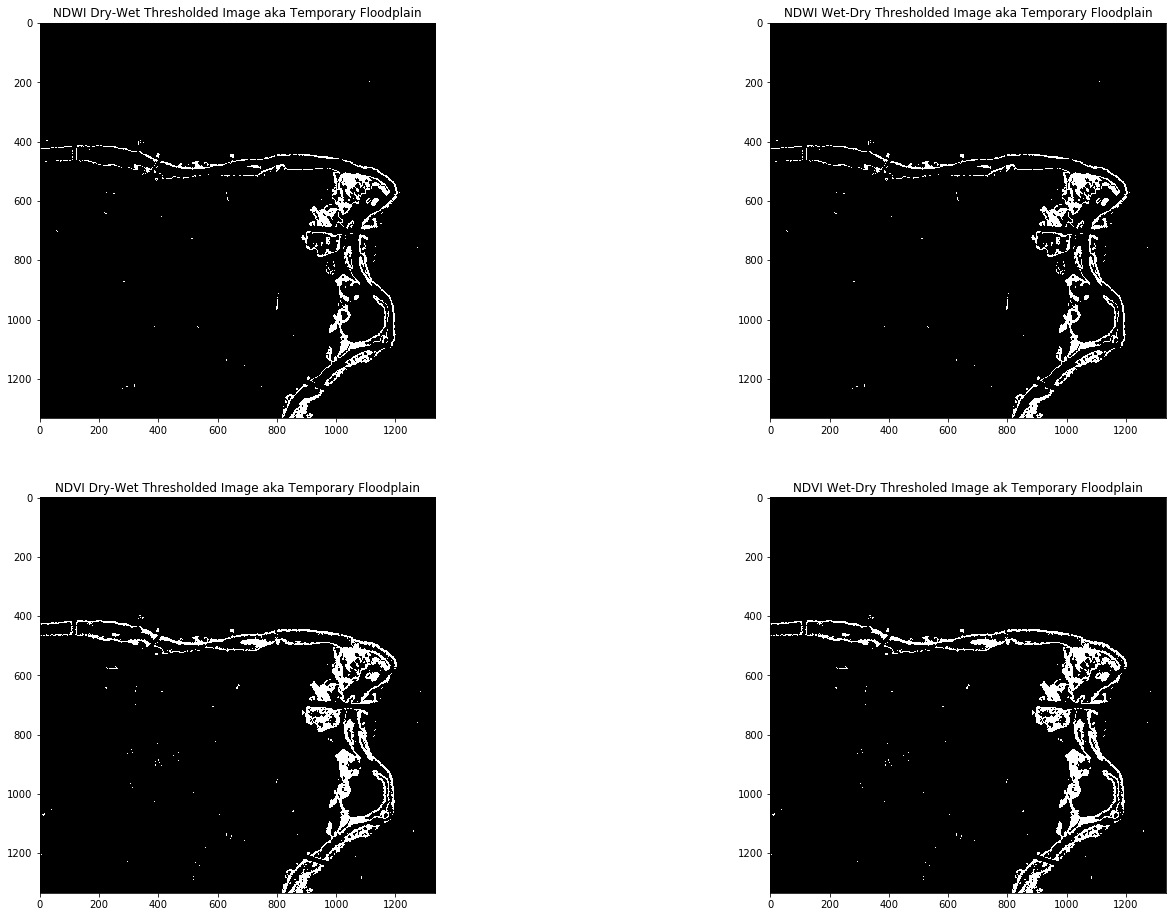

In [10]:
plt.figure(figsize=(24,16))
plt.subplot(2, 2, 1)
plt.imshow(ndwi_dry_wet, cmap=plt.cm.gray)
plt.title('NDWI Dry-Wet Thresholded Image aka Temporary Floodplain')

plt.subplot(2, 2, 2)
plt.imshow(ndwi_wet_dry, cmap=plt.cm.gray)
plt.title('NDWI Wet-Dry Thresholded Image aka Temporary Floodplain')

plt.subplot(2, 2, 3)
plt.imshow(ndvi_dry_wet, cmap=plt.cm.gray)
plt.title('NDVI Dry-Wet Thresholded Image aka Temporary Floodplain')

plt.subplot(2, 2, 4)
plt.imshow(ndvi_wet_dry, cmap=plt.cm.gray)
plt.title('NDVI Wet-Dry Thresholed Image ak Temporary Floodplain')
plt.show()

In [11]:
ndwi_dw_sum = np.sum(ndwi_dry_wet)
ndwi_wd_sum = np.sum(ndwi_wet_dry)
ndvi_dw_sum = np.sum(ndvi_dry_wet)
ndvi_wd_sum = np.sum(ndvi_wet_dry)
print('Total Temporary Floodplain from NDWI: ', ndwi_dw_sum, ndwi_wd_sum)
print('Total Temporary Floodplain from NDVI: ', ndvi_dw_sum, ndvi_wd_sum)

Total Temporary Floodplain from NDWI:  54591 54591
Total Temporary Floodplain from NDVI:  76335 76335


In [12]:
def pixels_to_floodplain_acres(pixel_count):
    pixel_area = 3.1*3.1
    sq_meter_area = pixel_count*pixel_area
    floodplain_acres = sq_meter_area / 4046.856    
    return round(floodplain_acres, 2)

In [13]:
ndwi_floodplain_pixels = ndwi_dw_sum
ndvi_floodplain_pixels = ndvi_dw_sum
ndwi_floodplain_acres = pixels_to_floodplain_acres(ndwi_floodplain_pixels)
ndvi_floodplain_acres = pixels_to_floodplain_acres(ndvi_floodplain_pixels)
print('Total Temporary Floodplain Acres from NDWI: ', ndwi_floodplain_acres)
print('Total Temporary Floodplain Acres from NDVI: ', ndvi_floodplain_acres)

Total Temporary Floodplain Acres from NDWI:  129.64
Total Temporary Floodplain Acres from NDVI:  181.27


[0 1 2]
[0 1 2]


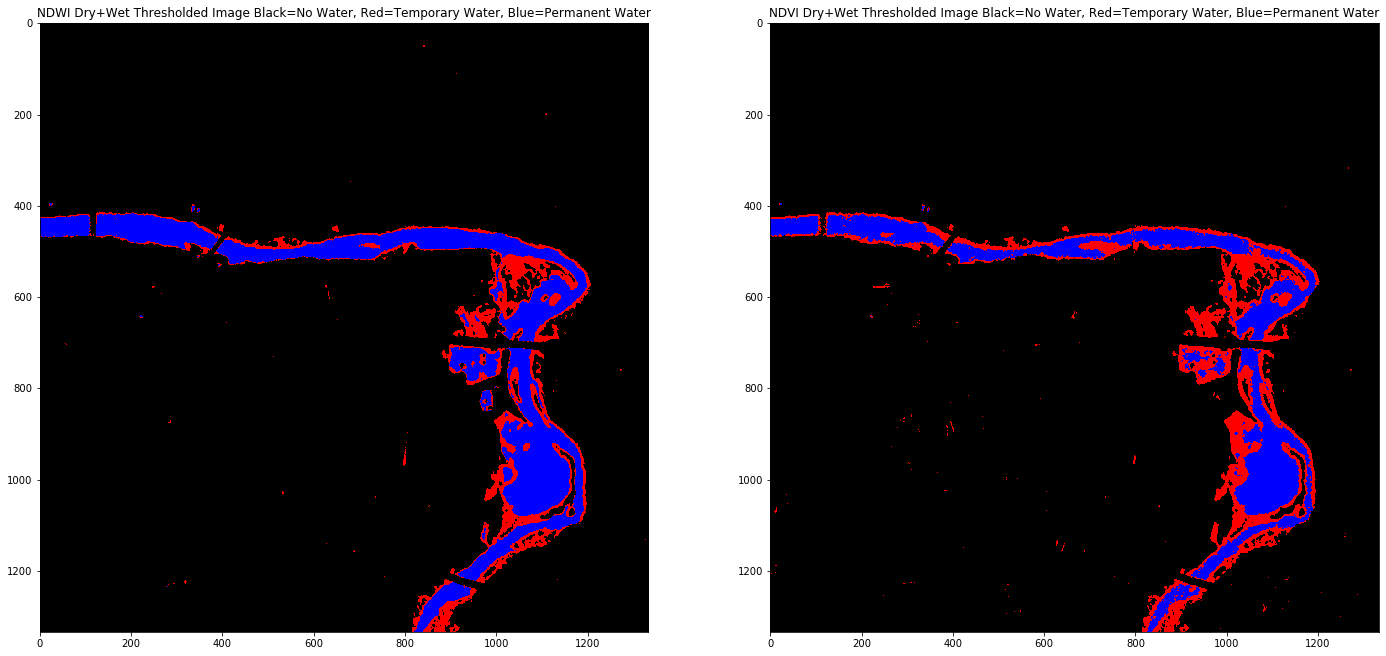

In [14]:
ndwi_dw_three_sum = ndwi_dry_timg.astype(int) + ndwi_wet_timg.astype(int)
ndvi_dw_three_sum = ndvi_dry_timg.astype(int) + ndvi_wet_timg.astype(int)
Customcmap1 = matplotlib.colors.ListedColormap(['black', 'red', 'blue'])
print(np.unique(ndwi_dw_three_sum))
print(np.unique(ndvi_dw_three_sum))
plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(ndwi_dw_three_sum, cmap=Customcmap1)
plt.title('NDWI Dry+Wet Thresholded Image Black=No Water, Red=Temporary Water, Blue=Permanent Water')

plt.subplot(1, 2, 2)
plt.imshow(ndvi_dw_three_sum, cmap=Customcmap1)
plt.title('NDVI Dry+Wet Thresholded Image Black=No Water, Red=Temporary Water, Blue=Permanent Water')
plt.show()

In [15]:
merge_test = ndwi_dw_three_sum + ndvi_dw_three_sum
print(np.unique(merge_test))

[0 1 2 3 4]


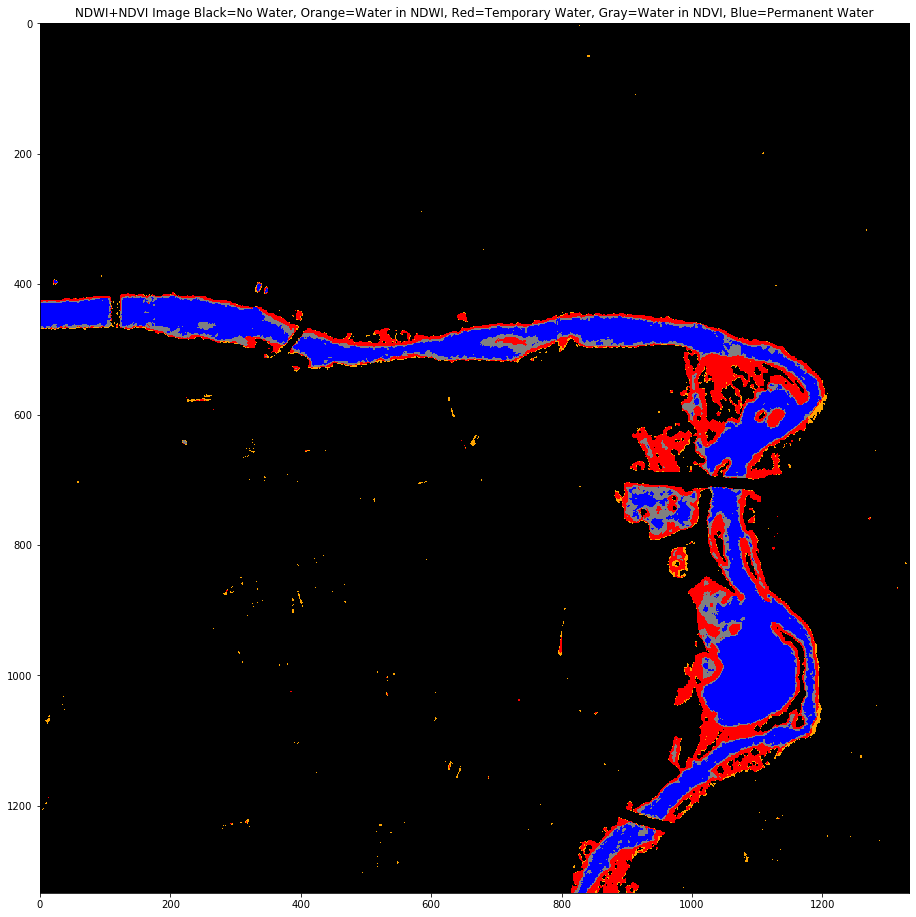

In [16]:
Customcmap1 = matplotlib.colors.ListedColormap(['black','orange','red', 'gray', 'blue'])
plt.figure(figsize=(24, 16))
plt.imshow(merge_test, cmap=Customcmap1)
plt.title('NDWI+NDVI Image Black=No Water, Orange=Water in NDWI, Red=Temporary Water, Gray=Water in NDVI, Blue=Permanent Water')
plt.show()

In [17]:
ndwi_ndvi_agreed_floodplain = (merge_test == 2).sum()

In [18]:
agreed_floodplain_acres = pixels_to_floodplain_acres(ndwi_ndvi_agreed_floodplain)
print('Total Temporary Floodplain Acres from NDWI: ', ndwi_floodplain_acres)
print('Total Temporary Floodplain Acres from NDVI: ', ndvi_floodplain_acres)
print('Total Temporary Floodplain Acres agreed (NDWI and NDVI): ', agreed_floodplain_acres)

Total Temporary Floodplain Acres from NDWI:  129.64
Total Temporary Floodplain Acres from NDVI:  181.27
Total Temporary Floodplain Acres agreed (NDWI and NDVI):  119.35


Conclusions:<br>Notice that even with just two images combining NDWI and NDVI introduces alot of noise into our data product, (more from NDVI than NDWI). Thus if the analysis was scaled to say 50 or 250 images over a time period instead of just 2 images the compounding factor of the noise would likely increase. So a more thorough data exploration/investigation might reveal that NDVI is too detrimental for an analysis at scale. Also even if only NDWI is used, how can more of the noise or incorrectly labelled pixels be removed/improved upon?